In [23]:
from __future__ import division
from utils import *
from functions import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



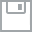
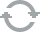
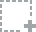
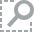
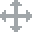
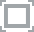
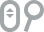
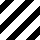
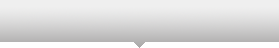
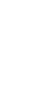
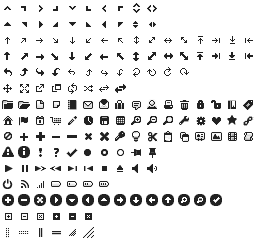
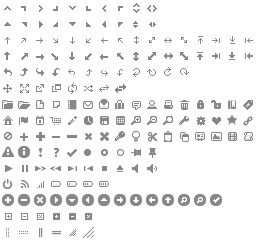
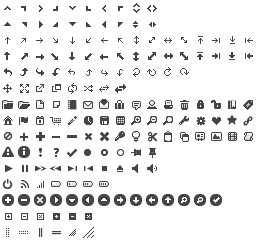
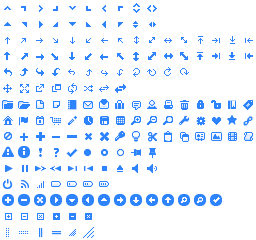
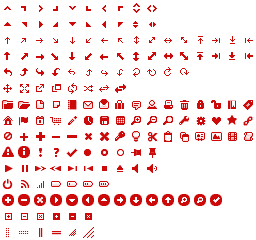
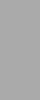
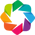
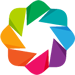

In [3]:
from bokeh.io import output_notebook
output_notebook()

In [4]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH()

# styling
gammaColor = '#00cc99'

def xax(gamma, duration):
    x= np.arange(0,(duration-1)/1000,(duration)/1000/len(gamma) )
    return x

## PLASTICITY FUNCTION OF RATIO AND STIM 

In [5]:
N = 2500
G = 4.8
d1 = 10000
d2 = 10000
d3 = 10000
before = d1+d2
after = d3
S = 100
sigma = 60
WII = 500
FACT = 1
ratio = 13
r=0.8
model = "gp-izh"
it = 8
binsize=1000
coeff=1
stimVals = range(0,200,20)
ratioRange = range(7,22,2)
# ratioRange=[7]
# stimVals = [80]
for FACT in [1]:
    for ratio in ratioRange:
        LTD  = 4.7e-6 * FACT * N
        LTP = ratio * LTD
        Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N=N, r=r,G=G,S=S, d1=d1, d2=d2, d3=d3, \
                                                         before=before, after=after,s=sigma,
                               WII=WII, LTP=LTP, LTD=LTD, model=model) for S in stimVals)

    colors = plt.cm.Purples(np.linspace(0, 1, len(stimVals)*3))

    for ratio in ratioRange:
        fig = plt.figure(figsize=(6,4))
        ax = fig.add_subplot(111)
        ax.set_ylim([0,5])
        LTD  = 4.7e-6 * FACT * N
        LTP = ratio * LTD
        for S, c in zip(stimVals, colors[int(len(colors)/3):]):
            spikes_x, spikes_y, spikes_x_tc, spikes_y_tc,\
            gamma, correlation, ssp1,\
            stimulation,p,q,lowsp,vm = cortex.readSimulation(N, r, 0, G, S, d1, d2, d3, \
                                                             before, after, WII, LTP, LTD, model, )
            titlestr = r'$N=%d$  $\frac{\alpha_{LTP}}{\alpha_{LTD}}=%d$  $g_0=%.1f$  $\nu=%d$' %(N, ratio, G, sigma)

            plt.plot(xax(gamma,d1+d2+d3), gamma, color=c)
            plt.title(titlestr)
            cycle = []
            for i,g in enumerate(gamma):
                if i<(len(gamma)-10)/3 or i>=2*len(gamma)/3:
                    cycle.append([g,30])
                else:
                    cycle.append([g,S])
            np.save(DIRECTORY + 'cycle-%d-%d-%.2f'%(S,ratio, FACT), cycle)
        plt.savefig(DIRECTORY+'all-gamma_%d-%.2f.pdf'%(ratio,FACT))

KeyboardInterrupt: 

## CORRELATION + GAMMA + LFP

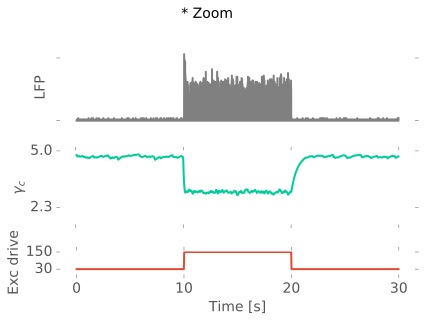

In [19]:
S = 120
N = 2500
ratio =17

FACT = 1
LTD  = 4.7e-6 * FACT * N
LTP = ratio * LTD

spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = cortex.readSimulation(N,r, 0, G, S, d1, d2, d3, before, after, WII, LTP, LTD, model)
# # _,_,_,_,ssp  = cortex.readPSTH(N,r, G,S, 1,binsize, d1, d2, d3, before, after, sigma, WII, LTP, LTD, model,coeff,RON='IAF', tau_m = 1)

# ssp1 =ssp
color = 'grey'
fig = plt.figure(figsize=(6,4))
ax = plt.subplot2grid((5, 1), (2, 0), rowspan=2)
# ax = fig.add_subplot(312)
# ax.set_xticklabels([])
ax.set_yticks([2.3,5])
ax.set_ylim([1.5,5])
ax.plot(xax(gamma,d1+d2+d3), gamma, color=gammaColor)
# ax.plot(xax(gamma,d1+d2+d3), np.ones(len(xax(gamma,d1+d2+d3)))*np.nanmin(gamma))
ax.set_ylabel(r'$\gamma_c$')
# ax = fig.add_subplot(313)
# ax.plot(xax(correlation,d1+d2+d3),correlation, color=color)
ax.set_xticklabels([])
# ax.set_ylabel('Correlation')
# ax.text(9.75,5,'* Zoom')
# ax.set_xlabel('Time [s]')
# ax = fig.add_subplot(311)
ax = plt.subplot2grid((5, 1), (0, 0), rowspan=2)
# ax.plot(xax(ssp1,d1+d2+d3),ssp1)
ssp2 = ssp1
ax.plot(np.arange(0,len(ssp2)*2,2),ssp2, color=color)
ax.set_yticklabels([])
ax.set_ylabel('LFP')
ax.set_xticks([])
ax.text(78000,82,'* Zoom', fontsize =14)
# ax.set_xlim([0,360000])

# ax = fig.add_subplot(313)
ax = plt.subplot2grid((5, 1), (4, 0))
ax.plot(xax(stimulation,d1+d2+d3), stimulation)
ax.plot(xax(gamma,d1+d2+d3), gamma, color='w')
ax.set_yticks([30,150])
ax.set_yticklabels([30,150])
ax.set_ylabel('Exc drive')
ax.set_xlabel('Time [s]')
# ax.plot(np.arange(0,len(ssp2)*2,2),ssp2*0)
plt.tight_layout()
plt.savefig(DIRECTORY + 'gammaPTSH2_-S%d-r-%d.pdf'%(S,ratio))

In [14]:
np.nanmin(gamma)

2.89106

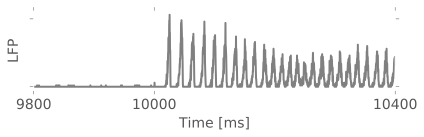

In [15]:
xlim = [9.8,10.4]
xlim2 = [xlim[0]*1000, xlim[1]*1000]
## GAMMA
fig = plt.figure(figsize=(6,2))


## LFP
ax = fig.add_subplot(111)
# ax.plot(xax(ssp1,d1+d2+d3),ssp1)
ax.plot(np.arange(0,len(ssp1)/4,0.25),ssp1, color=color)
ax.set_yticklabels([])
ax.set_ylabel('LFP')
# ax.set_xticks([])
ax.set_xlim(xlim2)
ax.set_xticks([9800,10000,10400])
ax.set_xlabel('Time [ms]')
plt.tight_layout()
plt.savefig(DIRECTORY + 'gammaPTSH_lim_-S%d-r-%d.pdf'%(S,ratio))

In [9]:
def findIndex2(spikes_x,val):
    res = (spikes_x-val).argmin()
    return res

findIndex2(spikes_x,20500)

876326

In [20]:
xlim2 = [9800,10400]
# ylim = [1500,4000]
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x1 = findIndex2(spikes_x,int(xlim2[0]))
x2 = findIndex2(spikes_x,int(xlim2[1]))
# ax.set_ylim(ylim)
ax.scatter(spikes_x[x1:x2], spikes_y[x1:x2], marker='.', color='grey')
ax.set_yticks([250,1500])
ax.set_yticklabels(['I', 'E'])
# ax.set_ylabel('Neuron index')
ax.set_xticklabels([])
plt.savefig(DIRECTORY+'rasterplot-r%d.png'%(ratio))

## PLOT LIMIT CYCLE

(100, 71)


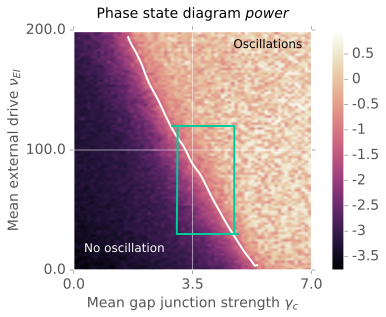

In [25]:
# LOAD DATA
column_names =['gammaC','nuEI','corI', 'spike','non-burst','burst', 'freq','power']
path = os.path.expanduser("/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/_data_IAF3-wii500-n2500-r08-s60.csv")
df = pd.read_csv(path, names= column_names ,  dtype ='float32' , sep=";")

###################################
# bursting
###################################
fig = plt.figure(figsize=(6,8))
extent = [np.min(df['gammaC']), np.max(df['gammaC']), np.min(df['nuEI']), np.max(df['nuEI'])]
ax = fig.add_subplot(211)
dataframe = df[(df['freq']<1000)]
dataframe['logpower']= (dataframe['power']).apply(np.log10)
title = r'Phase state diagram $power$'
filename = "global_gap_junctions_bursting.pdf" 
column = 'logpower'

ax = gr.plotDiagram(fig, ax, dataframe, title, column, filename, extent=extent)

df_sliced = dataframe[(dataframe['logpower']>-1.25) & (dataframe['logpower']<-1.1)]
contour = df_sliced[['gammaC','nuEI']].get_values()
yvals, xvals = gr.bezier_curve(contour, nTimes=100)
frontier = np.array([xvals,yvals])
ax.set_ylabel(r'Mean external drive $\nu_{EI}$')
ax.set_xlabel(r'Mean gap junction strength $\gamma_c$')
# ax.set_xlabel('')
# ax.set_xticklabels([])
ax.plot(frontier[1,:], frontier[0,:], '-w', linewidth=2, color='w')
ax.text(4.7,185, 'Oscillations', fontsize=12)
ax.text(0.3,15, 'No oscillation', fontsize=12, color='w')
# plt.plot(contour[:,0], contour[:,1], '.')
# plt.plot(pt[:,1], pt[:,0], '.')
todayStr = '20160215'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
cycle  = np.load(DIRECTORY + 'cycle-%d-%d-%.2f.npy'%(S,ratio, FACT))

plt.plot(cycle[:,0], cycle[:,1], color=gammaColor)
plt.savefig(DIRECTORY + 'bursting_phase_plan_cycle-r%d.pdf'%(ratio))

## PLOT RASTER WITH GPU

In [5]:
gr.plotRasterGPU(spikes_x[x1:x2],spikes_y[x1:x2], "")

NameError: name 'x1' is not defined

## SPECTROGRAM

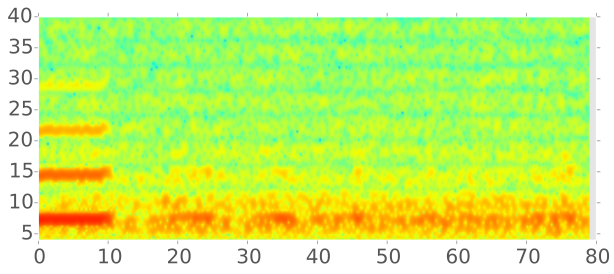

In [200]:
dt = 0.00025


# x = [np.sin(2*i) + np.sin(i) + 5*np.random.rand()+np.sin(3*i) for i in np.arange(0,40000)]
NFFT = 6000      # the length of the windowing segments
Fs = 1/dt  # the sampling frequency

# ax1 = plt.subplot(211)
# plt.plot(t, x)
ax = plt.subplot(111)
ax.grid(False)
Pxx, freqs, bins, im = plt.specgram(movingaverage(ssp1[:],1000), NFFT=NFFT, Fs=Fs, noverlap = 5000, pad_to=12000,
                             detrend='none'   )
ax.set_ylim([4,40])
plt.show()